In [128]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('datatraining.txt')# source: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+
df[['CO2','Light']]

,CO2,Light
1,721.250000,426.0
2,714.000000,429.5
3,713.500000,426.0
4,708.250000,426.0
5,704.500000,426.0
6,701.000000,419.0
7,701.666667,419.0
8,699.000000,419.0
9,689.333333,419.0
10,688.000000,419.0


In [130]:
model = LogisticRegression()
model.fit(df[['Temperature', 'Light']], df['Occupancy'])
print((model.predict(df[['Temperature', 'Light']]) == df['Occupancy']).mean())
print(model.coef_)

0.9879651234188874
[[-0.42161722  0.02574601]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


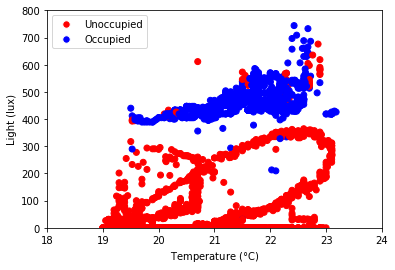

In [136]:
from matplotlib.lines import Line2D

cmap = plt.cm.coolwarm
plt.scatter(df['Temperature'], df['Light'], c=df['Occupancy'].map(lambda x: 'b' if x else 'r'))
plt.set_cmap(cmap)
plt.ylim([0, 800])
plt.xlim([18, 24])

plt.xlabel('Temperature ($\degree$C)')
plt.ylabel('Light (lux)')

custom_lines = [Line2D([0], [0], marker='.', label='Unoccupied',
                       markerfacecolor='r', color='w', markersize=15),
                Line2D([0], [0], marker='.', label='Occupied',
                       markerfacecolor='b', color='w', markersize=15)]

plt.legend(custom_lines, ['Unoccupied', 'Occupied'])

plt.show()

(0, 800)

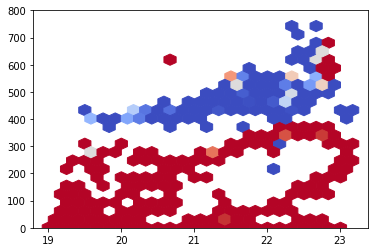

In [144]:
plt.hexbin(df['Temperature'], df['Light'], C=1-df['Occupancy'],reduce_C_function=np.mean, gridsize=(25, 25))
plt.ylim([0, 800])

In [72]:
import numpy as np
xx, yy = np.mgrid[18:24:.01, 0:800:1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

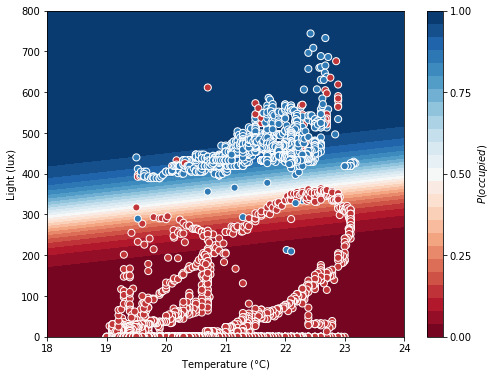

In [135]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(occupied)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(df['Temperature'], df['Light'], c=df['Occupancy'], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(xlim=(18, 24), ylim=(0, 800),
       xlabel="Temperature ($\degree$C)", ylabel="Light (lux)")
plt.show()

In [77]:
print(model.coef_)

[[-0.42161722  0.02574601]]


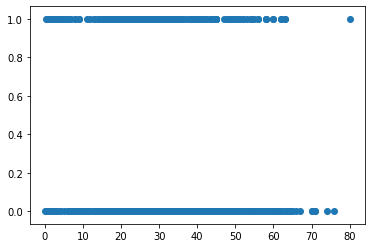

In [14]:
plt.scatter(df['Age'], df['2urvived'])
plt.show()

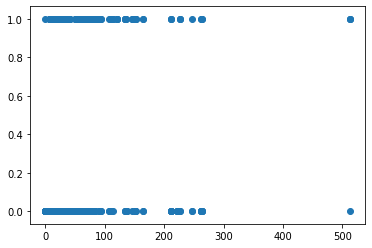

In [15]:
plt.scatter(df['Fare'], df['2urvived'])
plt.show()